<a href="https://colab.research.google.com/github/Mercy161/-AirBnB_clone_v3/blob/main/easy_ml_tutorial_2_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EASY-ML Tutorial 2: Classifier By Hand

An implementation of a classifier.

From: https://clairedavid.github.io/intro_to_ml/assignments/ml_a1.html

## 1) GET THE DATA

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path="gdrive/MyDrive/data/ml_a1/"

In [ ]:
import sys, os
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv(path + "calo_shower_data.csv")
df[:5]

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron


### Q 1.1: Columns
The dataset contains three columns: `shower_depth`, `shower_width` and `type`. The latter column stores the labels: `electron` for signal and `hadron` for background.

### Q 1.2: Number of samples

In [ ]:
print(f'There are {len(df)} samples in the dataset.')

There are 100000 samples in the dataset.


## 2) FEATURE SCALING

### Q 2.1: Explain with math
With positive $\theta$ at start, the linear sum $h_\theta(\boldsymbol{x})$ with $x_1$ and $x_2$ also positive and around $O(10)$ and $O(100)$ will be large. This translates
 as the logistic function outputting a value very close to 1 (already at $z$ = 5 the sigmoid is 0.99). For background samples, where $y$=0, the cost function's term of the cross entropy in $-\log(1 - h_\theta(\boldsymbol{x}))$ will be extremely large.


### Q 2.2: Standardization

In [ ]:
MEAN_X1, SIGMA_X1 = df['shower_depth'].mean() , df['shower_depth'].std()
MEAN_X2, SIGMA_X2 = df['shower_width'].mean() , df['shower_width'].std()

df['shower_depth_scaled'] = (df['shower_depth'] - MEAN_X1)/SIGMA_X1
df['shower_width_scaled'] = (df['shower_width'] - MEAN_X2)/SIGMA_X2

## 3) DATA PREP

### Q 3.1: Adding the `x0` column

In [ ]:
df['x0'] = 1

### Q 3.2: Matrix `X`

In [ ]:
inputs = ['x0', 'shower_depth_scaled', 'shower_width_scaled']
X = df[inputs]

### Q 3.3: Target `y`
We use `.loc` with a condition:

In [ ]:
df['y'] = 0
df.loc[df['type'] == 'electron', 'y'] = 1
y = df[['y']]

## 4) DATAFRAME TO NUMPY

In [ ]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split( X, y, test_size=0.2, random_state=42)

X_train = X_train_df.to_numpy() ; y_train = y_train_df.to_numpy()
X_test  = X_test_df.to_numpy()  ; y_test  = y_test_df.to_numpy()

### Q 4.1: Shapes

In [ ]:
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (80000, 3), y_train: (80000, 1), X_test: (20000, 3), y_test: (20000, 1)


Shape indicates the number of row i and number of columns j as `(i, j)`.  
As there are 2 input features, the number of columns for `X_train` and `X_test` is n + 1 = 3. The extra column is the $x_0$ = 1 that serves for the intercept term $\theta_0$ while computing the linear sum of the features with the $\boldsymbol{\theta}$ vector.

The `y_train` and `y_test` are containing labels in the form of one (scalar) value 0 or 1. `y_train` and `y_test` are column vectors. Hence they have dimension 1 in the second position of the shape tuple.

### Q 4.2: Test size
We have a total of 100000 samples. The `test_size` represents the percentage of samples to be used for the test set. Thus 100000 $\times$ 0.20 = 20000. The test set (`X_test` and `y_test`) have 20000 rows, aka samples. The `X_train` and `y_train` sets have the remaining amount, 100000 - 20000 = 80000 samples.

## 5) USEFUL FUNCTIONS

### Q 5.1: Linear sum

In [ ]:
# Linear sum of the parameters with features:
def lin_sum(X, thetas):

  # X is a matrix       : m  x (n+1)
  # thetas is a row vec : 1  x (n+1)

  # X and theta should have same number of columns:
  if X.shape[1] != thetas.shape[1]:
    sys.exit("lin_sum: Can't perform dot product.")

  # Returning column vector  m x 1
  return X @ (thetas.T)

### Q 5.2: Logistic Function

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z) )

### Q 5.3: Hypothesis Function

In [ ]:
def h_class(X, thetas):
  return sigmoid(lin_sum(X, thetas))

### Q 5.4: Partial Derivatives of Cross Entropy Cost Function

In [ ]:
def derivatives_cross_entropy(y_preds, y_obs, x_feature, debug=False):

  m = y_preds.shape[0]

  # Partial derivative in linear case:
  summand = ( y_preds - y_obs ) * x_feature

  if debug:
    print(f'y_preds = {y_preds.shape}, y_obs = {y_obs.shape}, x_feature  = {x_feature.shape}')
    print(f'summand: {summand.shape}')

  # Returning the sum over all samples:
  return (1 / m) * summand.sum()

### Q 5.5: Cross-Entropy Cost Function

In [ ]:
def cross_entropy_cost(y_vals, y_preds, debug=False):
    m = len(y_vals)

    if debug:
        print(f"{'i':>2} | {'y':>4} | {'ŷ':>4} | {'log2(ŷ)':>9} | {'log2(1−ŷ)':>12}")
        print("-" * 42)
    for i in range(min(m, 10)):  # show only first 10
        y      = y_vals[i, 0]
        y_pred = y_preds[i, 0]
        log_y_pred    = np.log2(y_pred) if y_pred > 0 else float('-inf')
        log_1_y_pred  = np.log2(1 - y_pred) if y_pred < 1 else float('-inf')
        print(f"{i:2} | {y:.2f} | {y_pred:.2f} | {log_y_pred:9.2f} | {log_1_y_pred:12.2f}")

    summand = y_vals * np.log2(y_preds) + (1 - y_vals) * np.log2(1 - y_preds)
    return -(1 / m) * summand.sum()

In [ ]:
# Testing
y_true = np.array([[1], [0], [1], [1], [0]])
y_pred = np.array([[0.9], [0.1], [0.8], [0.95], [0.2]])

cost = cross_entropy_cost(y_true, y_pred, debug=True)
print(f"\nCross-entropy cost: {cost:.4f}")

 i |    y |    ŷ |   log2(ŷ) |    log2(1−ŷ)
------------------------------------------
 0 | 1.00 | 0.90 |     -0.15 |        -3.32
 1 | 0.00 | 0.10 |     -3.32 |        -0.15
 2 | 1.00 | 0.80 |     -0.32 |        -2.32
 3 | 1.00 | 0.95 |     -0.07 |        -4.32
 4 | 0.00 | 0.20 |     -2.32 |        -0.32

Cross-entropy cost: 0.2044


## 6) CLASSIFIER
The core of the action.

In [ ]:
def print_every(iter_index, first_step, second_step, index_changing_step):
    if first_step <= 0 or second_step <= 0:
        raise ValueError("Steps must be positive integers.")

    if iter_index == 0:
        return True  # Always print at the first iteration

    if iter_index <= index_changing_step:
        return iter_index % first_step == 0
    else:
        return iter_index % second_step == 0

In [ ]:
# Hyperparameters
alpha = 0.5
N = 1000 # epochs

# Number of features + 1 (number of columns in X)
n = X_train.shape[1]

# Initialization of theta *row vector*
thetas = np.random.rand(1, n)

# Storing cost values for train and test datasets
costs_train = []
costs_test  = []

print("Starting gradient descent\n")

# -------------------
#   Start iterations
# -------------------
for iter_idx in range(N):

    # Get predictions (hypothesis function)
    y_preds = h_class(X_train, thetas)
    y_preds_test = h_class(X_test, thetas)

    # Calculate and store costs with train and test datasets
    J_train = cross_entropy_cost(y_train, y_preds); costs_train.append(J_train)
    J_test  = cross_entropy_cost(y_test, y_preds_test); costs_test.append(J_test)

    # Get partial derivatives d/dTheta_j
    dJ_thetas = np.zeros(shape=(1, n))
    for j in range(n):
        x_feature = X_train[:,j].reshape((-1, 1)) # one column vector (m x 1)
        dJ_thetas[0, j]= derivatives_cross_entropy(y_preds, y_train, x_feature)

    # Calculate new theta parameters:
    thetas_new = thetas - alpha * dJ_thetas

    # Update the parameters for the next iteration
    thetas = thetas_new

    # --------------------
    #  P R I N T O U T S
    # --------------------
    # Pretty print: every 10 iters; after 100 iterations, print every 100 iterations
    if print_every(iter_idx, 10, 100, 100):
        print(
            f"Iter {iter_idx:>4}\t"
            f"θ₀ = {thetas[0, 0]:>7.4f}\t∂J/∂θ₀ = {dJ_thetas[0, 0]:>8.4e}\t"
            f"θ₁ = {thetas[0, 1]:>7.4f}\t∂J/∂θ₁ = {dJ_thetas[0, 1]:>8.4e}\t"
            f"θ₂ = {thetas[0, 2]:>7.4f}\t∂J/∂θ₂ = {dJ_thetas[0, 2]:>8.4e}\t"
            f"Cost = {J_train:>8.5f}"
        )

    # Exit condition
    epsilon = 1e-6
    all_grads_vanish = np.all(np.abs(dJ_thetas) < epsilon)
    if all_grads_vanish:
        print("\n /!\ All partial derivatives are near zero! Exiting gradient descent.")
        break

print(f"\nEnd of gradient descent after {iter_idx + 1} iterations\n")

subscripts = ['₀', '₁', '₂']
print("Optimized parameters:")
for j in range(3):
    print(f"\tθ{subscripts[j]} = {thetas[0, j]:>7.4f}")

print(f"\nFinal training cost: {J_train:.5f}")

Starting gradient descent

Iter    0	θ₀ =  0.1731	∂J/∂θ₀ = 3.5426e-02	θ₁ =  0.1865	∂J/∂θ₁ = 4.6012e-01	θ₂ =  0.3898	∂J/∂θ₂ = 4.3836e-01	Cost =  1.56386
Iter   10	θ₀ =  0.0471	∂J/∂θ₀ = 1.5588e-02	θ₁ = -0.8983	∂J/∂θ₁ = 1.1587e-01	θ₂ = -0.6291	∂J/∂θ₂ = 1.0053e-01	Cost =  0.59899
Iter   20	θ₀ = -0.0170	∂J/∂θ₀ = 1.1291e-02	θ₁ = -1.3047	∂J/∂θ₁ = 6.2622e-02	θ₂ = -0.9584	∂J/∂θ₂ = 4.7748e-02	Cost =  0.50679
Iter   30	θ₀ = -0.0670	∂J/∂θ₀ = 9.0396e-03	θ₁ = -1.5561	∂J/∂θ₁ = 4.2352e-02	θ₂ = -1.1413	∂J/∂θ₂ = 2.9635e-02	Cost =  0.47586
Iter   40	θ₀ = -0.1073	∂J/∂θ₀ = 7.3258e-03	θ₁ = -1.7353	∂J/∂θ₁ = 3.1361e-02	θ₂ = -1.2627	∂J/∂θ₂ = 2.0711e-02	Cost =  0.46106
Iter   50	θ₀ = -0.1401	∂J/∂θ₀ = 5.9863e-03	θ₁ = -1.8718	∂J/∂θ₁ = 2.4388e-02	θ₂ = -1.3509	∂J/∂θ₂ = 1.5479e-02	Cost =  0.45277
Iter   60	θ₀ = -0.1671	∂J/∂θ₀ = 4.9353e-03	θ₁ = -1.9798	∂J/∂θ₁ = 1.9555e-02	θ₂ = -1.4184	∂J/∂θ₂ = 1.2074e-02	Cost =  0.44769
Iter   70	θ₀ = -0.1894	∂J/∂θ₀ = 4.1051e-03	θ₁ = -2.0674	∂J/∂θ₁ = 1.6010e-02	θ₂ = -1.4719	∂J/∂θ₂ = 

## 7) PLOT: COST VS EPOCH
Provided.

In [ ]:
import matplotlib.pyplot as plt

FONTSIZE = 16
params = {
         'axes.labelsize' : FONTSIZE,
         'axes.titlesize' : FONTSIZE,
         'legend.fontsize': FONTSIZE,
         'xtick.labelsize': FONTSIZE,
         'ytick.labelsize': FONTSIZE,
         'xtick.color'    : 'black',
         'ytick.color'    : 'black',
         'axes.facecolor' : 'white',
         'axes.edgecolor' : 'black',
         'axes.titlepad'  :  20,
         'axes.labelpad'  :  10}
plt.rcParams.update(params)

In [ ]:
def plot_cost_vs_iter(train_costs, test_costs, title="Gradient Descent: Cost evolution"):

  fig, ax = plt.subplots(figsize=(8, 6))

  iters = np.arange(1,len(train_costs)+1)

  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')

  ax.set_xlabel("Number of iterations")
  ax.set_ylabel(r"Cost $J(\theta)$", rotation="horizontal")
  ax.yaxis.set_label_coords(-0.2, 0.5)

  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title, fontsize=18, pad=20)
  plt.show()

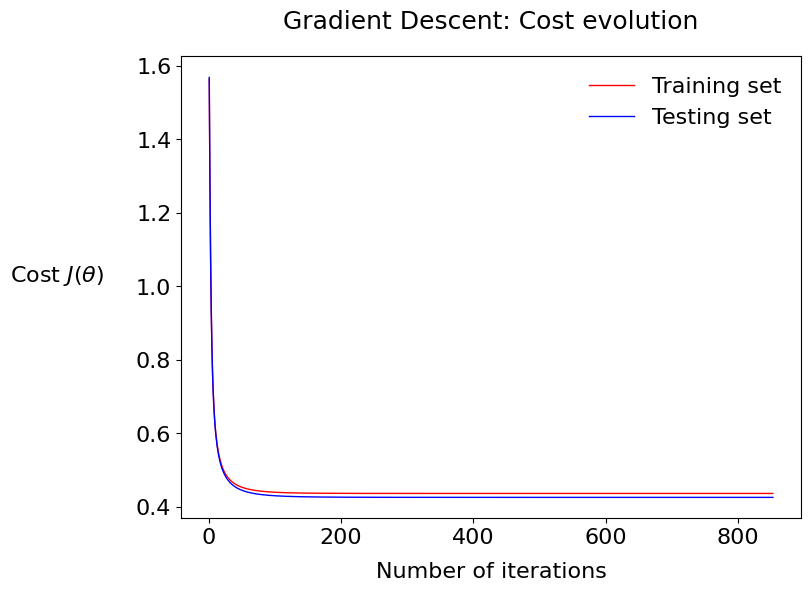

In [ ]:
plot_cost_vs_iter(costs_train, costs_test)

### Q 7.1: Explain
This plot shows the values of the cost at each epoch for the training and testing sets. The fundamental difference in the two series resides in the fact that the model parameters are updated using the partial derivatives __on the training set__ only, never the testing set. __The testing set provides values to compute the cost and has no influence on the model parameter optimization. It serves as a check__.

### Q 7.2: If a gap
If there were a gap with the testing set plateauing higher than the training set, __it would mean that the classifier fails to adapt to new data__, as the cost (global error) is greater than with the training set. This is likely due to the fact the classifier has been overtrained with the training data special features. This is a high variance problem. It can be reduced by reducing the model complexity, aka number of input features.

Note: here we do not have this problem, the testing is rather successful!

## 8. Performance assessment

### Q 8.0: Binary predictions

In [ ]:
def make_predictions(thetas, X, y, boundary=0.5):

  # Thetas : 1 x (n+1)
  #    X   : m x (n+1)
  #    y   : m x 1

  bin_preds = [1 if value > boundary else 0 for value in h_class(X, np.array(thetas))[:,0] ]

  return bin_preds

In [ ]:
preds = make_predictions(thetas, X_test, y_test, 0.5)

In [ ]:
# Turn y_test into 1D array:
obs_test = y_test[:,0]

### Q 8.1: Accuracy

In [ ]:
def get_accuracy(obs_values, pred_values):

    if len(obs_values) != len(pred_values):
        sys.exit("Lists of observed and predicted values are not equal in length!")

    n_total_preds = len(obs_values)
    n_true_preds = 0
    for y_obs, y_pred in zip(obs_values, pred_values):
        # Case of a true positive or true negative
        if (y_obs == 1 and y_pred == 1) or (y_obs == 0 and y_pred == 0):
            n_true_preds += 1
    return n_true_preds/n_total_preds

In [ ]:
accuracy = get_accuracy(obs_test, preds)
print(f'Classifier accuracy: {accuracy:.4f}')

Classifier accuracy: 0.8806


### Q 8.2: Recall

In [ ]:
def get_recall(obs_values, pred_values):

    if len(obs_values) != len(pred_values):
        sys.exit("Lists of observed and predicted values are not equal in length!")
    TP = 0 # number of True Positives
    FN = 0 # number of False Negatives (signal incorrectly classified as bkg)

    for y_obs, y_pred in zip(obs_values, pred_values):
        # Case true positive
        if y_obs == 1 and y_pred == 1:
            TP +=1
        # Case false negative
        elif y_obs == 1 and y_pred == 0:
            FN +=1
    return TP/(TP+FN)

In [ ]:
recall = get_recall(obs_test, preds)
print(f'Classifier recall: {recall:.4f}')

Classifier recall: 0.9049


## X) DECISION BOUNDARIES [BONUS]

### X.0: Scatter Plot

In [ ]:
X1NAME = 'shower_depth'; X1LABEL = 'Shower depth [mm]'
X2NAME = 'shower_width'; X2LABEL = 'Shower width [mm]'
X1MIN  = 0 ; X1MAX = 200
X2MIN  = 0 ; X2MAX =  60

In [ ]:
# Split signal and background in 2 different dataframes:
all_sig = df[df['type'] == 'electron'][['shower_depth', 'shower_width']]
all_bkg = df[df['type'] ==  'hadron' ][['shower_depth', 'shower_width']]

In [ ]:
# Raw scatter plot
def plot_scatter(sig, bkg, boundaries=False,
                 x1name=X1NAME, x1label=X1LABEL, x1min=X1MIN, x1max=X1MAX,
                 x2name=X2NAME, x2label=X2LABEL, x2min=X2MIN, x2max=X2MAX,
                 figsize=(6, 6), fontsize=20, alpha=0.2, title="Scatter plot"):

  fig, ax = plt.subplots(figsize=figsize)

  # ------------------
  #      A X E S
  # ------------------
  ax.set(xlim=(x1min, x1max), ylim=(x2min, x2max))
  ax.set_xlabel(x1label); ax.set_ylabel(x2label)

  # ------------------
  #   S C A T T E R
  # ------------------
  scat_el = ax.scatter(sig[x1name], sig[x2name], marker='.', s=1, c='dodgerblue', alpha=alpha)
  scat_had= ax.scatter(bkg[x1name], bkg[x2name], marker='.', s=1, c='darkorange', alpha=alpha)

  # ----------------------
  #  B O U N D A R I E S
  # ----------------------
  if boundaries:
    # Values       0.90       0.75       0.5        0.25        0.10
    colors  = ['dodgerblue', 'teal', 'orangered', 'orange', 'darkorange']
    lstyles = [':', '--', '-', '--', ':']
    for bd, color, ls in zip(boundaries, colors, lstyles):
      # Thick white line to see better
      ax.plot([x1min, x1max], [bd['x2_left'], bd['x2_right']],
              c='w', ls='-', lw=2.6)
      # Colored line on top
      ax.plot([x1min, x1max], [bd['x2_left'] , bd['x2_right']],
              c=color, label=f"$\hat{{y}}$ = {bd['threshold']:.2f}", ls=ls, lw=2)

  # ------------------
  #   L E G E N D S
  # ------------------
  # Legend scatter
  h = [scat_el, scat_had]
  legScatter = ax.legend(handles=h, labels=['electron', 'hadron'],
                         title="Shower type\n", title_fontsize=fontsize, markerscale=20,
                         bbox_to_anchor=(1.06, 0.8), loc="center left" , frameon=False)

  # Legend boundary
  if boundaries:
    ax.add_artist(legScatter)
    legLines = ax.legend(title="Decision boundaries",
                       bbox_to_anchor=(1.06, 0.3), loc="center left",
                       title_fontsize=fontsize, frameon=False)

  ax.set_title(title, fontsize=fontsize, pad=20)
  print('\n\n') ; plt.show()

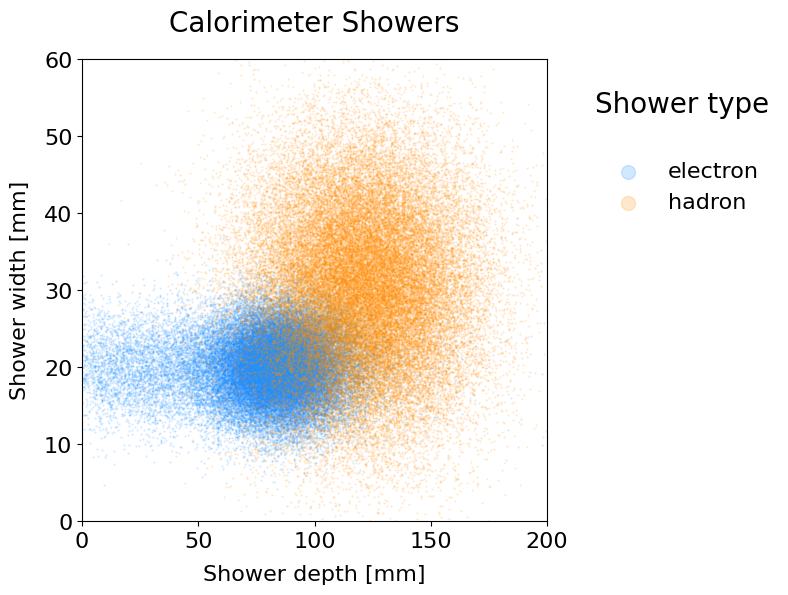

In [ ]:
plot_scatter(all_sig, all_bkg,
             figsize=(6, 6), fontsize=20, alpha=0.2, title="Calorimeter Showers")

### Q X.1: Useful functions
The reverse of the logistic function is
\begin{equation}
z = - \log \left( \frac{1 - \widehat{y}}{\widehat{y}}\right)
\end{equation}


To scale data:
\begin{equation}
\widehat{x}^{(i)}_j = \frac{x^{(i)}_j - \mu_j}{\sigma_j}
\end{equation}

To unscale data:
\begin{equation}
x^{(i)}_j = \widehat{x}^{(i)}_j \; \sigma_j + \mu_j
\end{equation}


In [ ]:
# Reverse sigmoid
def rev_sigmoid(yhat):
  return -np.log( (1 - yhat)/yhat )

# Convert raw inputs to scaled inputs
def scale_inputs(xj_vals, mean, sigma):
  return (np.array(xj_vals) - mean)/sigma

# Convert scaled inputs to raw inputs
def unscale_inputs(xj_vals, mean, sigma):
  return np.array(xj_vals)*sigma + mean

### Q X.2 Boundary line coordinates

The line equation is:
\begin{equation}
\widehat{x}_2 = \frac{ - \log \left( \frac{1 - \widehat{y}}{\widehat{y}}\right) - \theta_1 \widehat{x}_1 - \theta_0}{\theta_2}
\end{equation}

In [ ]:
# Get the values (x1_min, x2_left) and (x1_max, x2_right) of decision boundaries
def get_boundary_line_x2(thresholds, thetas, x1min=X1MIN, x1max=X1MAX):

  # Scale x1 values
  x1_lims_norm = scale_inputs([x1min, x1max], MEAN_X1, SIGMA_X1)

  # Filling a list of x2 left/right values
  x2_lims_list = []

  for yhat in thresholds:

    # Threshold is the probability, need to use reverse logistic function:
    z_val = rev_sigmoid(yhat)

    # Compute line's x2 coordinates at x1_min/max (left/right on scatter plot):
    x2_lims_norm = (z_val - thetas[1]*x1_lims_norm - thetas[0])/thetas[2]

    # Rescale the x2 values to the original raw data
    x2_lims = unscale_inputs(x2_lims_norm, MEAN_X2, SIGMA_X2)

    x2_lims_list.append({'threshold': yhat, 'x2_left':x2_lims[0] , 'x2_right':x2_lims[1]})

  return x2_lims_list

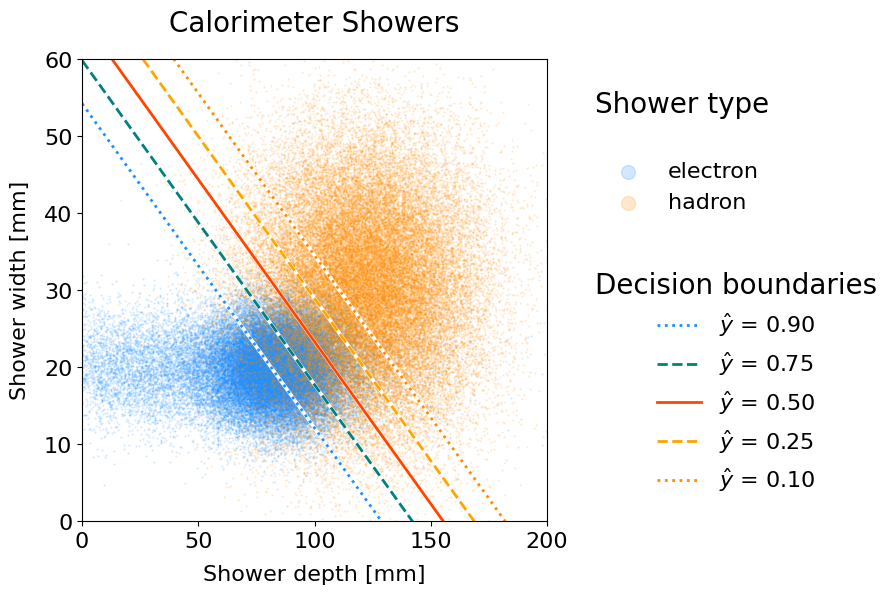

In [ ]:
plot_scatter(all_sig, all_bkg,
             boundaries=get_boundary_line_x2([0.90, 0.75, 0.5, 0.25, 0.10], thetas[0,:]),
             figsize=(6, 6), fontsize=20, alpha=0.2, title="Calorimeter Showers")

Predictions that are above the decision boundary threshold are labelled as signal. Here on the scatter plot it translates as 'what is below the line'

\begin{equation}
\text{sigmoid}(\theta_0 \widehat{x}_0 + \theta_1 \widehat{x}_1 + \theta_2 \widehat{x}_2) > \widehat{y} \;\;\;\;\;\Rightarrow\;\;\;\;\; x_2 < \frac{ - \log \left( \frac{1 - \widehat{y}}{\widehat{y}}\right) - \theta_1 \widehat{x}_1 - \theta_0}{\theta_2} \;\;\;
\end{equation}


The higher the threshold, the more 'signal-like' the events are. We 'drift' away from the background. We can see the higher threshold lines are shifting to the lower left part of the plot where more electron showers are present.
